In [39]:
from bs4 import BeautifulSoup

html = """
        <!DOCTYPE html>
        <html lang="en">
        <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Document</title>
        </head>
        <body>
        <div id="main">
            <h1 class="title">python scraping</h1>
            <h1 class="test">test</h1>
            <p class="desc">data extract ex</p>
            <a href="https://exsample.com" class="link">more</a>

            <ul class="items">
                <li data-id="101">1st</li>
                <li data-id="102">2nd</li>
                <li data-id="103">3rd</li>
            </ul>
        </div>
        </body>
        </html>
 """

soup = BeautifulSoup(html, "html.parser")
print(soup)
print(type(soup))

print(html)
print(type(html))


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title>Document</title>
</head>
<body>
<div id="main">
<h1 class="title">python scraping</h1>
<h1 class="test">test</h1>
<p class="desc">data extract ex</p>
<a class="link" href="https://exsample.com">more</a>
<ul class="items">
<li data-id="101">1st</li>
<li data-id="102">2nd</li>
<li data-id="103">3rd</li>
</ul>
</div>
</body>
</html>

<class 'bs4.BeautifulSoup'>

        <!DOCTYPE html>
        <html lang="en">
        <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Document</title>
        </head>
        <body>
        <div id="main">
            <h1 class="title">python scraping</h1>
            <h1 class="test">test</h1>
            <p class="desc">data extract ex</p>
            <a href="https://exsample.com" class="link">more</a>

            <ul class="items

In [23]:
# find("tag") - 전체문서의 첫번째

h1_tag = soup.find("h1")

print(h1_tag)
print(h1_tag.text)

<h1 class="title">python scraping</h1>
python scraping


In [41]:
#fine("tag", class_="desc")

h1_class = soup.find("h1", class_="test")
h1_class
# print(h1_class)

<h1 class="test">test</h1>

In [47]:
# find_all("tag")

h1_all = soup.find_all("h1")
h1_all
print(h1_all)
print(h1_all[0].text)


[<h1 class="title">python scraping</h1>, <h1 class="test">test</h1>]
python scraping


In [55]:
# select('css')
css_li = soup.select('.items li')

print(css_li)

for item in css_li:
    print(f'- {item.text}')

[<li data-id="101">1st</li>, <li data-id="102">2nd</li>, <li data-id="103">3rd</li>]
- 1st
- 2nd
- 3rd


In [75]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://finance.yahoo.com/quote/005930.KS/history/'
headers = {
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/143.0.0.0 Safari/537.36',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7'
}

res = requests.get(url,headers=headers)

html = res.text

soup = BeautifulSoup(html, "html.parser")

# print(soup)
# print(html)

first_table = soup.find('table')
first_tr = soup.find('tr')
first_class = first_tr.get('class')[0]

# print(first_table)
# print(first_class)
# print(soup.find_all("td", class_=first_class)[0].text)
# print(soup.find_all("td", class_=first_class)[1].text)
# print(soup.find_all("td", class_=first_class)[2].text)
# print(soup.find_all("td", class_=first_class)[3].text)
# print(soup.find_all("td", class_=first_class)[4].text)
# print(soup.find_all("td", class_=first_class)[5].text)
# print(soup.find_all("td", class_=first_class)[6].text)

first_date = pd.to_datetime(soup.find_all("td", class_=first_class)[0].text).strftime('%Y %m %d')
print(first_date)

first_price = soup.find_all("td", class_=first_class)[1].text.replace('.00','won')
print(first_price)


2026 01 05
134,600won


In [122]:
rows = soup.find_all('tr', class_=first_class)
print(len(rows))

dates = []
prices = []

for item in range(1, len(rows)):
    cells = rows[item].find_all('td')

    if len(cells) == 7:
        # date = pd.to_datetime(cells[0].text).strftime('%Y - %m - %d')
        date = pd.to_datetime(cells[0].text)

        close_price = cells[4].text.replace(',', '').replace('.00', '')
        prices.append(int(close_price))
        dates.append(date)

print(prices[0])
print(dates[0])

print(f'dates {dates[0]} price {prices[0]}')




245
136500
2026-01-05 00:00:00
dates 2026-01-05 00:00:00 price 136500


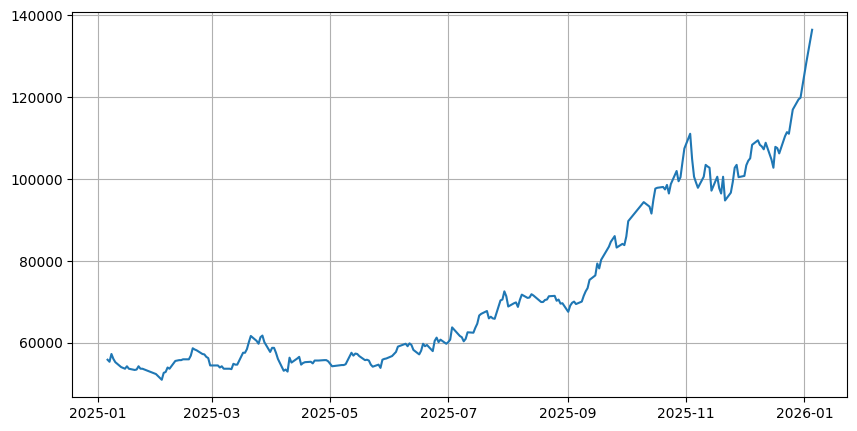

In [124]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

dates.reverse()
prices.reverse()

stock_data = pd.DataFrame({'date' : dates, 'price' :prices })
min_price = stock_data['price'].min()
max_price = stock_data['price'].max()
# y_ticks = range(min_price,max_price,30000)

plt.figure(figsize=(10,5))
plt.plot(stock_data['date'],stock_data['price'])
plt.grid(True)
# plt.yticks(y_ticks)
plt.show()




In [141]:
import pandas as pd
import requests 
from io import StringIO

stock_data = pd.DataFrame()

url = 'https://finance.yahoo.com/quote/005930.KS/history/'
headers = {
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/143.0.0.0 Safari/537.36',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7'
}

res = requests.get(url, headers=headers)

stock_data = pd.read_html(StringIO(str(res.text)),header=0)[0] 


stock_data.columns = ["date", "open" ,"high", "low", "close", 'increase', 'volume']

stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      244 non-null    object
 1   open      244 non-null    object
 2   high      244 non-null    object
 3   low       244 non-null    object
 4   close     244 non-null    object
 5   increase  244 non-null    object
 6   volume    244 non-null    object
dtypes: object(7)
memory usage: 13.5+ KB


In [142]:
stock_data["date"] = pd.to_datetime(stock_data['date'])
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      244 non-null    datetime64[ns]
 1   open      244 non-null    object        
 2   high      244 non-null    object        
 3   low       244 non-null    object        
 4   close     244 non-null    object        
 5   increase  244 non-null    object        
 6   volume    244 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 13.5+ KB


In [145]:
stock_data.isna().count()


date        244
open        244
high        244
low         244
close       244
increase    244
volume      244
dtype: int64

In [149]:
stock_data.to_csv("out1.csv",index=False,encoding="utf-8 sig")

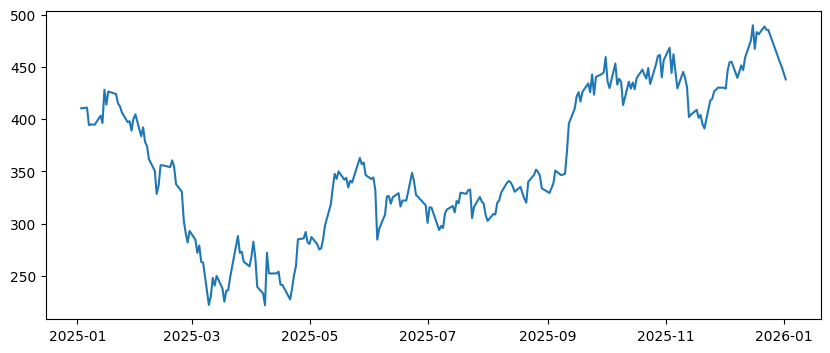

In [159]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# ticker = yf.Ticker("005930.KS")
ticker = yf.Ticker("TSLA")
df = ticker.history(period="1y")

df.head()
# print(df.head())

plt.figure(figsize=(10,4)) 
plt.plot(df.index, df.Close)
plt.show()

